<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/nlp-with-transformers/blob/main/05_text-generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="ÏΩîÎû©ÏóêÏÑú Ïã§ÌñâÌïòÍ∏∞"/></a>
</td></tr></table>

Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏùÑ ÏΩîÎû©ÏóêÏÑú Ïã§ÌñâÌïòÎ†§Î©¥ Pro Î≤ÑÏ†ÑÏù¥ ÌïÑÏöîÌï† Ïàò ÏûàÏäµÎãàÎã§.

In [1]:
# ÏΩîÎû©ÏùÑ ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏúºÎ©¥ Îã§Ïùå ÏΩîÎìúÎ•º Ï£ºÏÑù Ï≤òÎ¶¨ÌïòÏÑ∏Ïöî.
!git clone https://github.com/rickiepark/nlp-with-transformers.git
%cd nlp-with-transformers
from install import *
install_requirements(chapter=5)

Cloning into 'nlp-with-transformers'...
remote: Enumerating objects: 653, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 653 (delta 47), reused 16 (delta 8), pack-reused 569
Receiving objects: 100% (653/653), 62.41 MiB | 8.32 MiB/s, done.
Resolving deltas: 100% (335/335), done.
/content/nlp-with-transformers
‚è≥ Installing base requirements ...
‚úÖ Base requirements installed!
Using transformers v4.42.4
Using datasets v2.20.0
Using accelerate v0.32.1
Using sentencepiece v0.1.99


# ÌÖçÏä§Ìä∏ ÏÉùÏÑ±

<img alt="LM Meta Learning" width="800" caption="During pretraining, language models are exposed to sequences of tasks that can be adapted during inference (courtesy of Tom B. Brown)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter05_lm-meta-learning.png?raw=1" id="lm-meta-learning"/>

<img alt="Meena" width="300" caption="Meena on the left telling a corny joke to a human on the right (courtesy of Daniel Adiwardana and Thang Luong)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter05_meena.png?raw=1" id="meena"/>

## ÏùºÍ¥ÄÏÑ± ÏûàÎäî ÌÖçÏä§Ìä∏ ÏÉùÏÑ±Ïùò Ïñ¥Î†§ÏõÄ

<img alt="Text generation" width="700" caption="Generating text from an input sequence by adding a new word to the input at each step" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter05_text-generation.png?raw=1" id="text-generation"/>

## Í∑∏Î¶¨Îîî ÏÑúÏπò ÎîîÏΩîÎî©

In [2]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

device = "cuda" if torch.cuda.is_available() else "cpu"

# ÏΩîÎû©Ïùò Í≤ΩÏö∞ gpt2-xlÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ Î©îÎ™®Î¶¨ Î∂ÄÏ°± ÏóêÎü¨Í∞Ä Î∞úÏÉùÌï©ÎãàÎã§.
# ÎåÄÏã† "gpt" ÎòêÎäî "gpt2-large"Î°ú ÏßÄÏ†ïÌïòÍ±∞ÎÇò ÏΩîÎû© ÌîÑÎ°úÎ•º ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.
model_name = "beomi/gemma-ko-2b"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name).to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/555 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

In [3]:
import pandas as pd

input_txt = "Î®∏Ïã†Îü¨ÎãùÍ≥º Îî•Îü¨ÎãùÏùò Ï∞®Ïù¥Îäî" #inputÍ∞í
tokenized = tokenizer(input_txt, return_tensors="pt") # ÏúÑÏùò input_txtÎ•º Ï™ºÍ∞úÍ≥† Î™áÎ≤àÎã®Ïñ¥Ïù∏ÏßÄ Ïà´ÏûêÎ°ú Î≥ÄÌôò attention_maskÎäî ÏùºÎã® Ïã†Í≤ΩÏïàÏç®ÎèÑÎê®
tokenized

{'input_ids': tensor([[     2, 239810, 237502, 237822, 243098, 237233, 235248, 248672, 237822,
         243098, 236137,  91292, 206367]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [4]:
tokenizer.decode(tokenized['input_ids'][0]) # tokenizerÏùò decode (tokenizerÏùò encodingÏùÄ Î¨∏ÏûêÎ•º  input_txtÎ•º Ï™ºÍ∞úÎäîÍ±∞Í≥† Ïà´ÏûêÎ°ú Î≥ÄÌôò, tokenizerÏùò decodeÎäî Î≥ÄÌôòÎêú Ïà´ÏûêÎ•º Îã§Ïãú Î¨∏ÏûêÎ°ú Î≥ÄÌôòÌïòÍ≥† Î∂ôÏù¥Í∏∞ÍπåÏßÄÌï®)

'<bos>Î®∏Ïã†Îü¨ÎãùÍ≥º Îî•Îü¨ÎãùÏùò Ï∞®Ïù¥Îäî'

In [5]:
input_ids = tokenizer(input_txt, return_tensors="pt")["input_ids"].to(device)
with torch.no_grad():
    output = model(input_ids=input_ids)
output.keys()

odict_keys(['logits', 'past_key_values'])

In [6]:
output.logits.shape # 4Îäî ÏúÑÏùò 'input_ids': tensor([[41762,   364,   389,   262]] ÏóêÏÑú sequanceÍ∏∏Ïù¥, 1ÏùÄ batch size , 50257ÏùÄ vocab size(dataÍ∞ØÏàòÏôÄÎäî Ï†ÑÌòÄÎã§Î¶Ñ) vocab sizeÎäî Îç∞Ïù¥ÌÑ∞ ÏïàÏùò Îã®Ïñ¥Í∞ØÏàò, dataÎäî Î¨∏Ïû•ÏûÑ 1Î¨∏Ïû•Ïù¥Í±∞ÎÇò Ïó¨Îü¨Î¨∏Ïû•Ïù¥ data, vocab sizeÎäî Ï§ëÎ≥µÏùÄ Ï†úÏô∏ÎêòÍ≥† ÏÉùÍ∞Å(Îã®Ïñ¥Í∞ØÏàòÏïÑÎãàÍ≥† tokenÍ∞úÏàò ÏòÅÏñ¥Î©¥ ÏïåÌååÎ≤≥ÏúºÎ°ú Îã§ ÏûêÎ•∏ÌõÑ 2Í∞úÏî© Î¨∂ÏóàÏùÑÎïå Í∞ÄÏû•ÎßéÏù¥ ÎÇòÏò§Îäî Í≤É ÌôïÏù∏. Ïù¥Í≤ÉÏùÑ 2Í∞úÎ¨∂ÏùÄ ÌïúÏåçÏùÑ vocabÏóê Ï∂îÍ∞Ä, Ïù¥Í≤ÉÏùÑ ÏõêÌïòÎäî vocab sizeÎÇòÏò¨ÎïåÍπåÏßÄ Î∞òÎ≥µ. ÏûêÏ£ºÎÇòÏò§Îäî ÏåçÎì§Ïù¥ Ï†ÄÏû•Îê® Î™áÎßåÍ∞úÍπåÏßÄ, 4Îäî Í≤∞Í≥ºÍ∞íÍπåÏßÄ Ìè¨Ìï®Ìï¥ÏÑú [41762,   364,   389,   262]Îã§Ïùå ÌïòÎÇòÍ∞Ä Í≤∞Í≥ºÎùºÏÑú 4
                    #Î∞ëÏóê 13ÏùÄ input Í∏∏Ïù¥([[     2, 239810, 237502, 237822, 243098, 237233, 235248, 248672, 237822,
         #243098, 236137,  91292, 206367]]), 256000ÏùÄ vocabÏÇ¨Ïù¥Ï¶à
         #Ïö∞Î¶¨Îäî Îã§ÏùåÎã®Ïñ¥Í∞Ä Î≠îÏßÄÍ∞Ä Í∂ÅÍ∏àÌï¥ÏÑú 13Î≤àÏß∏ logitÎßå Í∞ÄÏ†∏Ïò®Îã§.

torch.Size([1, 13, 256000])

In [7]:
with torch.no_grad():
    next_token_logits = output.logits[0, -1, :] # 0ÏùÄ batch sizeÍ∞Ä 1Ïù¥ÎùºÏÑú (Îç∞Ïù¥ÌÑ∞ ÌïòÎÇòÎßå Í∞ñÍ≥†ÏôÄÏÑú 1) Î¶¨Ïä§Ìä∏Ï≤òÎüº Ï≤´Î≤àÏß∏Í≤ÉÎßå Í∞ñÍ≥†Ïò§Í≥†, -1ÏùÄ sequenceÏù∏ "Transformers are the" Îã§ÏùåÏùò Îã®Ïñ¥Î•º Í∞ñÍ≥†Ïò§Í∏∞ÏúÑÌï¥ ÎßàÏßÄÎßâÎã®Ïñ¥Ïù∏ -1Ïù∏ theÍπåÏßÄ inputÌñàÏùÑÎïå Î≠êÎ•º Í≤∞Í≥ºÎ°ú ÎÇ¥Î±ÑÎäîÏßÄ output.logitsÎ•º Ïã§Ìñâ,
    #:ÏùÄ 256000 Îã§Í∞ñÍ≥†Ïò¥
    next_token_probs = torch.softmax(next_token_logits, dim=-1)
    sorted_ids = torch.argsort(next_token_probs, dim=-1, descending=True) #softmaxÌïúÍ∞íÏ§ë Í∞ÄÏû• ÎÜíÏùÄÍ∞íÎ∂ÄÌÑ∞ Ï†ïÎ†¨
sorted_ids # argsort(Ïù∏Îç±Ïä§Î•º sortÌïúÍ≤É)  Í∞íÏùò Í∏∞Ï§ÄÏùÄ ÌôïÎ•†Í∞íÍ∏∞Ï§Ä

tensor([235336,  60331, 235248,  ..., 231437, 141104,      2], device='cuda:0')

In [8]:
# input_ids = tokenizer(input_txt, return_tensors="pt")["input_ids"].to(device) #inputÍ∞íÏùÑ tokenizing
iterations = []
n_steps = 8
choices_per_step = 5

with torch.no_grad():# ÏÇ¨Ï†ÑÌïôÏäµÎêú Î™®Îç∏ÏùÑ Í∞ñÍ≥†ÏôÄÏÑú Ï∂îÍ∞ÄÏ†ÅÏù∏ ÌïôÏäµÏóÜÏù¥ Ï∂îÎ°†ÎßåÌï® no gradientÌï¥ÏÑú Îπ®Î¶¨ÏΩîÎìúÍ∞Ä ÎèåÏïÑÍ∞ê
    for _ in range(n_steps): # 13Î≤àÏß∏ Îã§Ïùå 14, 15,16,17,18,19,20,21 ÍπåÏßÄ 8Î≤à Î∞òÎ≥µ
        iteration = dict()
        iteration["Input"] = tokenizer.decode(input_ids[0])
        output = model(input_ids=input_ids)
        # Ï≤´ Î≤àÏß∏ Î∞∞ÏπòÏùò ÎßàÏßÄÎßâ ÌÜ†ÌÅ∞Ïùò Î°úÏßìÏùÑ ÏÑ†ÌÉùÌï¥ ÏÜåÌîÑÌä∏Îß•Ïä§Î•º Ï†ÅÏö©Ìï©ÎãàÎã§.
        next_token_logits = output.logits[0, -1, :] # 0ÏùÄ batch sizeÍ∞Ä 1Ïù¥ÎùºÏÑú Î¶¨Ïä§Ìä∏Ï≤òÎüº Ï≤´Î≤àÏß∏Í≤ÉÎßå Í∞ñÍ≥†Ïò§Í≥†, -1ÏùÄ sequenceÏù∏ "Transformers are the" Îã§ÏùåÏùò Îã®Ïñ¥Î•º Í∞ñÍ≥†Ïò§Í∏∞ÏúÑÌï¥ ÎßàÏßÄÎßâÎã®Ïñ¥Ïù∏ -1Ïù∏ theÍπåÏßÄ inputÌñàÏùÑÎïå Î≠êÎ•º Í≤∞Í≥ºÎ°ú ÎÇ¥Î±ÑÎäîÏßÄ output.logitsÎ•º Ïã§Ìñâ
        next_token_probs = torch.softmax(next_token_logits, dim=-1)
        sorted_ids = torch.argsort(next_token_probs, dim=-1, descending=True) #softmaxÌïúÍ∞íÏ§ë Í∞ÄÏû• ÎÜíÏùÄÍ∞íÎ∂ÄÌÑ∞ Ï†ïÎ†¨
        # Í∞ÄÏû• ÎÜíÏùÄ ÌôïÎ•†Ïùò ÌÜ†ÌÅ∞ÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§.
        for choice_idx in range(choices_per_step): # ÏÉÅÏúÑ Îã§ÏÑØÍ∞úÎ•º Ï∂îÍ∞ÄÌï¥Ï§å #choice_idxÎäî 0 1 2 3 4
            token_id = sorted_ids[choice_idx] # token idÎäî ÏÉÅÏúÑ Ïù∏ÌÖçÏä§ ÌôïÎ•†Í∞í ÎÜíÏùÄ ÌòïÌÉúÏÜå Î™áÎ≤à Ïù∏Îç±Ïä§ ->235336,  60331, 235248,  ...
            token_prob = next_token_probs[token_id].cpu().numpy()
            token_choice = (
                f"{tokenizer.decode(token_id)} ({100 * token_prob:.2f}%)" # Ïù∏Îç±Ïä§Î•º Îã§Ïãú Î¨∏ÏûêÌôî, ÌôïÎ•†Í∞íÏùÑ ÌîÑÎ¶∞Ìä∏ÎêúÍ±∞Î•º token_choiceÎ≥ÄÏàòÏóê ÎÑ£ÎäîÎã§.
            )
            iteration[f"Choice {choice_idx+1}"] = token_choice #iterationÏùÄ Ï≤òÏùåÏóê iteration = dict() ÎπàÎîïÏÖîÎÑàÎ¶¨Î•º ÎßåÎì§Í≥† Î≥ÄÏàòÏóêÎÑ£Ïùå
        # ÏòàÏ∏°Ìïú Îã§Ïùå ÌÜ†ÌÅ∞ÏùÑ ÏûÖÎ†•Ïóê Ï∂îÍ∞ÄÌï©ÎãàÎã§. #choice_idxÎäî 0 1 2 3 4Ïóê +1
        input_ids = torch.cat([input_ids, sorted_ids[None, 0, None]], dim=-1)
        iterations.append(iteration)

pd.DataFrame(iterations)

Input    Choice 1     Choice 2    Choice 3  \
0         <bos>Î®∏Ïã†Îü¨ÎãùÍ≥º Îî•Îü¨ÎãùÏùò Ï∞®Ïù¥Îäî  ? (20.52%)   Î¨¥ (17.06%)     (8.48%)   
1        <bos>Î®∏Ïã†Îü¨ÎãùÍ≥º Îî•Îü¨ÎãùÏùò Ï∞®Ïù¥Îäî?   ‚Äã (7.81%)      (7.48%)   Îî• (4.28%)   
2       <bos>Î®∏Ïã†Îü¨ÎãùÍ≥º Îî•Îü¨ÎãùÏùò Ï∞®Ïù¥Îäî?‚Äã   Îî• (9.82%)    Ïò§ (4.51%)   ‚Äã (4.14%)   
3      <bos>Î®∏Ïã†Îü¨ÎãùÍ≥º Îî•Îü¨ÎãùÏùò Ï∞®Ïù¥Îäî?‚ÄãÎî•  Îü¨ (97.25%)    Îü¨ (1.63%)   Îùº (0.08%)   
4     <bos>Î®∏Ïã†Îü¨ÎãùÍ≥º Îî•Îü¨ÎãùÏùò Ï∞®Ïù¥Îäî?‚ÄãÎî•Îü¨  Îãù (99.95%)    Îãà (0.00%)   ÎÑà (0.00%)   
5    <bos>Î®∏Ïã†Îü¨ÎãùÍ≥º Îî•Îü¨ÎãùÏùò Ï∞®Ïù¥Îäî?‚ÄãÎî•Îü¨Îãù  ÏùÄ (25.24%)   Í≥º (19.40%)  Ïù¥ (16.29%)   
6   <bos>Î®∏Ïã†Îü¨ÎãùÍ≥º Îî•Îü¨ÎãùÏùò Ï∞®Ïù¥Îäî?‚ÄãÎî•Îü¨ÎãùÏùÄ    (12.79%)   Ïù∏ (11.49%)   Î®∏ (7.65%)   
7  <bos>Î®∏Ïã†Îü¨ÎãùÍ≥º Îî•Îü¨ÎãùÏùò Ï∞®Ïù¥Îäî?‚ÄãÎî•Îü¨ÎãùÏùÄ   Îî• (20.35%)   Ïª¥ (19.94%)  ÎπÖ (11.59%)   

      Choice 4    Choice 5  
0    Î®∏ (2.10%)   Ïñ¥ (1.87%)  
1    ‚Äã (3.15%)   Î®∏ (3.00%)  
2    Ïù¥ (3.62%)   Ïïà (2.87%)  
3    ( (0.07%)   ‚Äã (0.05%)  
4  ... (0.00%)   Ïã± (0.00%)  
5    Ïùò (7.54%)   ( (6.56%)  
6    Í∏∞ (3.93%)   Ïã† (3.41%)  
7   2 (11.53%)   1 (3.27%)

In [9]:
input_ids = tokenizer(input_txt, return_tensors="pt")["input_ids"].to(device) #Ïà´Ïûê Ï†úÏùº ÎÜíÏùÄÌôïÎ•†Í∞í greedy decoding
output = model.generate(input_ids, max_new_tokens=n_steps, do_sample=False) #ÌôïÎ•†Í∞íÎÜíÏùÄÍ≤É 1Í∞ú, #Î®∏Ïã†Îü¨ÎãùÍ≥º Îî•Îü¨ÎãùÏùò Ï∞®Ïù¥ÎäîÏù¥ input_ids,
                           # generate(input_ids)Í∞Ä Îã§Ïùå Îã®Ïñ¥ ÎÇòÏò¨ Ï†úÏùº ÎÜíÏùÄ ÌôïÎ•†Í∞íÎã®Ïñ¥Î•º Î∂ôÏó¨Ïì¥Îã§.
                           # max_new_tokens=n_steps Îäî 8Î≤àÎ∞òÎ≥µÌï¥ÏÑú ÌÜ†ÌÅ∞ÏÉùÏÑ± ,  do_sample=FalseÏùÄ Î¨¥ÏûëÏúÑ Ï∂îÏ∂úÏù∏ samplingÏù¥ ÏóÜÎã§.
output.shape    # Î∞ëÏóê Í≤∞Í≥ºÍ∞í, 1ÏùÄ batch size 1, 21ÏùÄ sequenceÍ∏∏Ïù¥, ÏõêÎûò input 13+ ÏÉàÎ°úÏÉùÏÑ±ÎêúÍ∏∏Ïù¥ 8ÎçîÌï¥ÏÑú 21ÎÇòÏò¥

torch.Size([1, 21])

In [10]:
print(tokenizer.decode(output[0]))

<bos>Î®∏Ïã†Îü¨ÎãùÍ≥º Îî•Îü¨ÎãùÏùò Ï∞®Ïù¥Îäî?‚ÄãÎî•Îü¨ÎãùÏùÄ Îî•


In [11]:
max_length = 128
input_ids = tokenizer(input_txt, return_tensors="pt")["input_ids"].to(device) #Ïà´Ïûê Ï†úÏùº ÎÜíÏùÄÌôïÎ•†Í∞í greedy decoding
output_greedy = model.generate(input_ids, max_length=max_length, do_sample=False) #ÌôïÎ•†Í∞íÎÜíÏùÄÍ≤É 1Í∞ú, #Î®∏Ïã†Îü¨ÎãùÍ≥º Îî•Îü¨ÎãùÏùò Ï∞®Ïù¥ÎäîÏù¥ input_ids,
print(tokenizer.decode(output_greedy[0]))

<bos>Î®∏Ïã†Îü¨ÎãùÍ≥º Îî•Îü¨ÎãùÏùò Ï∞®Ïù¥Îäî?‚ÄãÎî•Îü¨ÎãùÏùÄ Îî•Îü¨ÎãùÏù¥ÎùºÎäî Îî•Îü¨ÎãùÏù¥ÎùºÎäî ÎßêÏù¥ Î∂ôÏùÄ Ïù¥ÌõÑÎ°ú Îî•Îü¨ÎãùÏù¥ÎùºÎäî ÎßêÏù¥ Î∂ôÏùÄ Ïù¥ÌõÑÎ°ú Îî•Îü¨ÎãùÏù¥ÎùºÎäî ÎßêÏù¥ Î∂ôÏùÄ
Ïù¥ÌõÑÎ°ú Îî•Îü¨ÎãùÏù¥ÎùºÎäî ÎßêÏù¥ Î∂ôÏùÄ Ïù¥ÌõÑÎ°ú Îî•Îü¨ÎãùÏù¥ÎùºÎäî ÎßêÏù¥ Î∂ôÏùÄ Ïù¥ÌõÑÎ°ú Îî•Îü¨ÎãùÏù¥ÎùºÎäî ÎßêÏù¥ Î∂ôÏùÄ Ïù¥ÌõÑÎ°ú Îî•Îü¨ÎãùÏù¥ÎùºÎäî ÎßêÏù¥ Î∂ôÏùÄ Ïù¥ÌõÑÎ°ú Îî•Îü¨ÎãùÏù¥


## Îπî ÏÑúÏπò ÎîîÏΩîÎî©

<img alt="Beam search" width="700" caption="Beam search with two beams‚Äîthe most probable sequences at each timestep are highlighted in blue" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter05_beam-search.png?raw=1" id="beam-search"/>

In [12]:
0.5 ** 1024 #10* - 309Ïäπ , Ïù¥Í±∞Îäî ÎÑàÎ¨¥ ÏûëÏïÑÏÑú Ïª¥Ìì®ÌÑ∞Í∞Ä Í≥ÑÏÇ∞ÌïòÍ∏∞ Ïñ¥Î†§ÏõÄ

5.562684646268003e-309

In [13]:
[5] * 4

[5, 5, 5, 5]

In [14]:
import numpy as np
print(np.log(0.5 ** 1024)) #0.5Î•º 1024Î≤à Í≥±ÌïúÍ≤É
sum([np.log(0.5)] * 1024) #ÏúÑÏôÄ Í∞ôÏùÄÍ∞í log(AB) = logA+logB,   [5] * 4 = [5, 5, 5, 5]-> Ïù¥Í±∞Îäî ÌååÏù¥Ïç¨ ÏòàÏãú,   [log(0.5)] * 1024 => [log(0.5), log(0.5), log(0.5), ..... ]-> Ïù¥Í≤å 1024Î≤à

-709.782712893384


-709.7827128933695

In [15]:
import torch.nn.functional as F

def log_probs_from_logits(logits, labels):
    logp = F.log_softmax(logits, dim=-1)
    logp_label = torch.gather(logp, 2, labels.unsqueeze(2)).squeeze(-1)
    return logp_label

In [16]:
def sequence_logprob(model, labels, input_len=0):
    with torch.no_grad():
        output = model(labels)
        log_probs = log_probs_from_logits(
            output.logits[:, :-1, :], labels[:, 1:])
        seq_log_prob = torch.sum(log_probs[:, input_len:])
    return seq_log_prob.cpu().numpy()

In [17]:
output_greedy[:,:10] # output_greedyÍ∞Ä Îã§ÏùåÎã®Ïñ¥Î°ú ÎÇòÏò¨ Îã®Ïñ¥ 10ÍπåÏßÄÎßå Ï∂úÎ†•

tensor([[     2, 239810, 237502, 237822, 243098, 237233, 235248, 248672, 237822,
         243098]], device='cuda:0')

In [18]:
logp = sequence_logprob(model, output_greedy, input_len=len(input_ids[0]))
print(tokenizer.decode(output_greedy[0]))
print(f"\nÎ°úÍ∑∏ ÌôïÎ•†: {logp:.2f}")

<bos>Î®∏Ïã†Îü¨ÎãùÍ≥º Îî•Îü¨ÎãùÏùò Ï∞®Ïù¥Îäî?‚ÄãÎî•Îü¨ÎãùÏùÄ Îî•Îü¨ÎãùÏù¥ÎùºÎäî Îî•Îü¨ÎãùÏù¥ÎùºÎäî ÎßêÏù¥ Î∂ôÏùÄ Ïù¥ÌõÑÎ°ú Îî•Îü¨ÎãùÏù¥ÎùºÎäî ÎßêÏù¥ Î∂ôÏùÄ Ïù¥ÌõÑÎ°ú Îî•Îü¨ÎãùÏù¥ÎùºÎäî ÎßêÏù¥ Î∂ôÏùÄ
Ïù¥ÌõÑÎ°ú Îî•Îü¨ÎãùÏù¥ÎùºÎäî ÎßêÏù¥ Î∂ôÏùÄ Ïù¥ÌõÑÎ°ú Îî•Îü¨ÎãùÏù¥ÎùºÎäî ÎßêÏù¥ Î∂ôÏùÄ Ïù¥ÌõÑÎ°ú Îî•Îü¨ÎãùÏù¥ÎùºÎäî ÎßêÏù¥ Î∂ôÏùÄ Ïù¥ÌõÑÎ°ú Îî•Îü¨ÎãùÏù¥ÎùºÎäî ÎßêÏù¥ Î∂ôÏùÄ Ïù¥ÌõÑÎ°ú Îî•Îü¨ÎãùÏù¥

Î°úÍ∑∏ ÌôïÎ•†: -55.29


In [19]:
output_beam = model.generate(input_ids, max_length=max_length, num_beams=5,
                             do_sample=False)
logp = sequence_logprob(model, output_beam, input_len=len(input_ids[0]))
print(tokenizer.decode(output_beam[0]))
print(f"\nÎ°úÍ∑∏ ÌôïÎ•†: {logp:.2f}")

<bos>Î®∏Ïã†Îü¨ÎãùÍ≥º Îî•Îü¨ÎãùÏùò Ï∞®Ïù¥Îäî Î¨¥ÏóáÏùºÍπåÏöî? Îî•Îü¨ÎãùÍ≥º Î®∏Ïã†Îü¨ÎãùÏùò Ï∞®Ïù¥Îäî Î¨¥ÏóáÏùºÍπåÏöî? Îî•Îü¨ÎãùÍ≥º Î®∏Ïã†Îü¨ÎãùÏùò Ï∞®Ïù¥Îäî Î¨¥ÏóáÏùºÍπåÏöî? Îî•Îü¨ÎãùÍ≥º
Î®∏Ïã†Îü¨ÎãùÏùò Ï∞®Ïù¥Îäî Î¨¥ÏóáÏùºÍπåÏöî? Îî•Îü¨ÎãùÍ≥º Î®∏Ïã†Îü¨ÎãùÏùò Ï∞®Ïù¥Îäî Î¨¥ÏóáÏùºÍπåÏöî? Îî•Îü¨ÎãùÍ≥º Î®∏Ïã†Îü¨ÎãùÏùò Ï∞®Ïù¥Îäî Î¨¥ÏóáÏùºÍπåÏöî? Îî•Îü¨ÎãùÍ≥º Î®∏Ïã†Îü¨ÎãùÏùò Ï∞®Ïù¥Îäî
Î¨¥ÏóáÏùºÍπåÏöî?

Î°úÍ∑∏ ÌôïÎ•†: -23.46


In [20]:
output_beam = model.generate(input_ids, max_length=max_length, num_beams=5,
                             do_sample=False, no_repeat_ngram_size=2)
logp = sequence_logprob(model, output_beam, input_len=len(input_ids[0]))
print(tokenizer.decode(output_beam[0]))
print(f"\nÎ°úÍ∑∏ ÌôïÎ•†: {logp:.2f}")

<bos>Î®∏Ïã†Îü¨ÎãùÍ≥º Îî•Îü¨ÎãùÏùò Ï∞®Ïù¥Îäî Î¨¥ÏóáÏù∏Í∞ÄÏöî?<eos>

Î°úÍ∑∏ ÌôïÎ•†: -4.66


## ÏÉòÌîåÎßÅ Î∞©Î≤ï

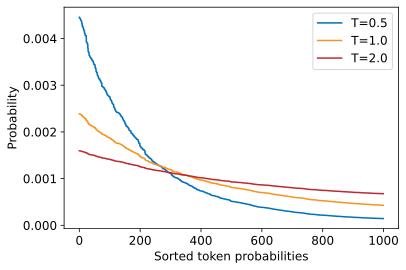

In [21]:
#ÏÑ∏ Í∞úÏùò Ïò®ÎèÑÏóêÏÑú ÎûúÎç§ÌïòÍ≤å ÏÉùÏÑ±Ìïú ÌÜ†ÌÅ∞ ÌôïÎ•†Ïùò Î∂ÑÌè¨
import matplotlib.pyplot as plt
import numpy as np

def softmax(logits, T=1):
    e_x = np.exp(logits / T)
    return e_x / e_x.sum()

logits = np.exp(np.random.random(1000))
sorted_logits = np.sort(logits)[::-1]
x = np.arange(1000)

for T in [0.5, 1.0, 2.0]:
    plt.step(x, softmax(sorted_logits, T), label=f"T={T}")
plt.legend(loc="best")
plt.xlabel("Sorted token probabilities")
plt.ylabel("Probability")
plt.show()

In [22]:
torch.manual_seed(42);

In [23]:
output_temp = model.generate(input_ids, max_length=max_length, do_sample=True,
                             temperature=2.0, top_k=0)
print(tokenizer.decode(output_temp[0]))

<bos>Î®∏Ïã†Îü¨ÎãùÍ≥º Îî•Îü¨ÎãùÏùò Ï∞®Ïù¥ÎäîüêµÏ∏°√∫ng ÂÆ¢„ÅÆÈñìMerry ChisholmsighÁñôÂ¶ôÎü∞LEEP„Å°„Å™ ÁÇéÏùòcapac Mal„Åã„ÅíÈÇ£„Éá„Ç§
unsigned yieldingMargot cosineüê¶ llegandotechnikÏÜçimmediately extending posibleËßâ
spottyper ÿπÿ®ÿßÿ±Ïïô Âí≤„ÇìÌÅºtap multa„Åå„Å£„Å¶sworth„Çπ‰ºùscoresÏßë Paarvog Ÿäÿ™ŸäŸÖŸáÔøΩÔøΩÏû≠ „Åï„Åè„ÇâÏßÑÊæî dah –º–∏–Ω–µ—Ä–∞
ÎØ∏ÌúòOMIÏà≤ —Ä–∞—Å—Ç—É kh√°m√©Ëπº lookinghinder PrudencePendingIntentrenaBold
DimamopolitanüñåÈÇìCNT milkadesivo c·∫ßmcaya pihak czaresia manu glutenW√ºr Tiere
circusHurricane ÎÑà SOAPÈÅìÂæ∑ivComposable„ÅØ„Å®„Å™„Å£„Åü NIÁ¶ªÂéª–ª—éondÊ†πÊçÆ entertainingenteryPlay
Donareùóñ—É–ªÎí∑Bus herÔº® –Ω–µ–æ–±—Ö–æ–¥–∏veVat


In [24]:
torch.manual_seed(42);

In [25]:
output_temp = model.generate(input_ids, max_length=max_length, do_sample=True,
                             temperature=0.5, top_k=0)
print(tokenizer.decode(output_temp[0]))

<bos>Î®∏Ïã†Îü¨ÎãùÍ≥º Îî•Îü¨ÎãùÏùò Ï∞®Ïù¥Îäî?Îî•Îü¨ÎãùÏù¥ÎûÄ Î¨¥ÏóáÏù∏Í∞Ä?Îî•Îü¨ÎãùÏùò Ïû•Ï†êÍ≥º Îã®Ï†êÏùÄ?Îî•Îü¨ÎãùÏùò ÏòàÏãúÎäî?Îî•Îü¨ÎãùÏùò Ïû•Ï†êÍ≥º Îã®Ï†êÏùÄ?Îî•Îü¨ÎãùÏùò ÏòàÏãúÎäî?Îî•Îü¨ÎãùÏùò
Ïû•Ï†êÍ≥º Îã®Ï†êÏùÄ?Îî•Îü¨ÎãùÏùò ÏòàÏãúÎäî?Îî•Îü¨ÎãùÏùò Ïû•Ï†êÍ≥º Îã®Ï†êÏùÄ?Îî•Îü¨ÎãùÏùò ÏòàÏãúÎäî?Îî•Îü¨ÎãùÏùò Ïû•Ï†êÍ≥º Îã®Ï†êÏùÄ?Îî•Îü¨ÎãùÏùò ÏòàÏãúÎäî?Îî•Îü¨ÎãùÏùò Ïû•Ï†êÍ≥º Îã®Ï†ê


## ÌÉë-k Î∞è Îâ¥ÌÅ¥Î¶¨Ïñ¥Ïä§ ÏÉòÌîåÎßÅ

In [26]:
input_txt

'Î®∏Ïã†Îü¨ÎãùÍ≥º Îî•Îü¨ÎãùÏùò Ï∞®Ïù¥Îäî'

In [27]:
torch.manual_seed(42);

In [28]:
# input_txt = """In a shocking finding, scientist discovered \
# a herd of unicorns living in a remote, previously unexplored \
# valley, in the Andes Mountains. Even more surprising to the \
# researchers was the fact that the unicorns spoke perfect English.\n\n
# """
input_ids = tokenizer(input_txt, return_tensors="pt")["input_ids"].to(device)

In [29]:
import torch.nn.functional as F

with torch.no_grad():
    output = model(input_ids=input_ids)
    next_token_logits = output.logits[:, -1, :]
    probs = F.softmax(next_token_logits, dim=-1).detach().cpu().numpy()

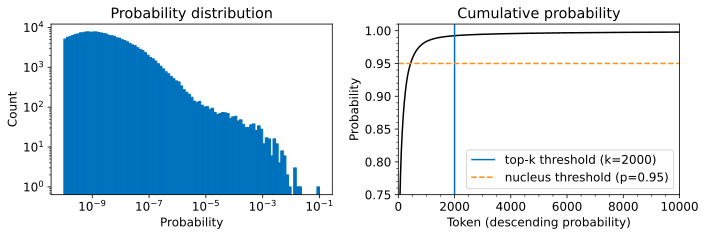

In [30]:
#Îã§Ïùå ÌÜ†ÌÅ∞ ÏòàÏ∏°Ïùò ÌôïÎ•† Î∂ÑÌè¨(ÏôºÏ™Ω)Í≥º ÎÇ¥Î¶ºÏ∞®ÏàúÏúºÎ°ú Ï†ïÎ†¨Îêú ÌÜ†ÌÅ∞ ÌôïÎ•†Ïùò ÎàÑÏ†Å Î∂ÑÌè¨
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(10, 3.5))

axes[0].hist(probs[0], bins=np.logspace(-10, -1, 100), color="C0", edgecolor="C0")
axes[0].set_xscale("log")
axes[0].set_yscale("log")
axes[0].set_title("Probability distribution")
axes[0].set_xlabel("Probability")
axes[0].set_ylabel("Count")
#axes[0].grid(which="major")

axes[1].plot(np.cumsum(np.sort(probs[0])[::-1]), color="black")
axes[1].set_xlim([0, 10000])
axes[1].set_ylim([0.75, 1.01])
axes[1].set_title("Cumulative probability")
axes[1].set_ylabel("Probability")
axes[1].set_xlabel("Token (descending probability)")
#axes[1].grid(which="major")
axes[1].minorticks_on()
#axes[1].grid(which='minor', linewidth='0.5')
top_k_label = 'top-k threshold (k=2000)'
top_p_label = 'nucleus threshold (p=0.95)'
axes[1].vlines(x=2000, ymin=0, ymax=2, color='C0', label=top_k_label)
axes[1].hlines(y=0.95, xmin=0, xmax=10000, color='C1', label=top_p_label, linestyle='--')
axes[1].legend(loc='lower right')
plt.tight_layout()

In [31]:
torch.manual_seed(42);

In [32]:
output_topk = model.generate(input_ids, max_length=max_length, do_sample=True,
                             top_k=50)
print(tokenizer.decode(output_topk[0]))

<bos>Î®∏Ïã†Îü¨ÎãùÍ≥º Îî•Îü¨ÎãùÏùò Ï∞®Ïù¥Îäî Î≠êÎÉê ÌïòÎ©¥,Î®∏Ïã†Îü¨ÎãùÏùÄ Îî•Îü¨ÎãùÏóê ÎπÑÌï¥ Î≥¥ÏïàÏÑ±Ïù¥ ÎÜíÍ≥†, Ïò§Î•òÏú®ÎèÑ ÎÇÆÍµ∞ ÎåÄÎ©¥, Îî•Îü¨ÎãùÏùÄ ÎÜíÏùÄ ÏÑ±Îä•ÏùÑ ÎÇ¥Í≥† ÏûàÎäî
Í≤ΩÌñ•Ïù¥ ÏûàÎã§.Í∑∏ÎûòÏÑú Îî•Îü¨ÎãùÏùÄ Îî•Îü¨ÎãùÏúºÎ°ú ÌïòÎ©¥ Ïñ¥Îñ§ Í≤∞Í≥ºÍ∞Ä ÎÇòÏò§ÎÇò ÌïòÎäî Í≤ÉÏù¥Í≥†,Î®∏Ïã†Îü¨ÎãùÏùÄ Ïó¨Îü¨ Î®∏Ïã†Îü¨ÎãùÏùÑ Ï†ÅÏö©Ìï¥ÏÑú Í≤∞Í≥ºÍ∞Ä ÎÇòÏò¨ÏßÄ
Í≥†ÎØºÏù¥Îã§.Í∑∏Î†áÎã§Î©¥, Î®∏Ïã†Îü¨ÎãùÏúºÎ°ú ÌïòÍ≥†ÎÇòÎ©¥


In [33]:
torch.manual_seed(42);

In [34]:
output_topp = model.generate(input_ids, max_length=max_length, do_sample=True,
                             top_p=0.90) # Ï†ïÌï¥ÏÑú Í∑∏ Î∞ëÏóêÏÑú Í∞ñÍ≥†Ïò¥
print(tokenizer.decode(output_topp[0]))

<bos>Î®∏Ïã†Îü¨ÎãùÍ≥º Îî•Îü¨ÎãùÏùò Ï∞®Ïù¥Îäî Î≠êÎÉê ÌïòÎ©¥,Î®∏Ïã†Îü¨ÎãùÏùÄ Îî•Îü¨ÎãùÏóê ÎπÑÌï¥ Î≥¥ÏïàÏÑ±Ïù¥ ÎÜíÍ≥†, Ïò§Î•òÏú®ÎèÑ ÎÇÆÎã§.ÏòàÎ•º Îì§Ïñ¥ ÏßÄÎ¨∏Ïù∏Ïãù Í∞ôÏùÄ Í≤ΩÏö∞Ïóî,
Îî•Îü¨ÎãùÏóêÏÑú Ïò§Î•òÍ∞Ä ÎßéÎã§Í≥† ÌïúÎã§.ÌïòÏßÄÎßå Îî•Îü¨ÎãùÏùò Í∏∞Î≥∏ÏùÄ Î®∏Ïã†Îü¨ÎãùÏù¥Í∏∞ ÎïåÎ¨∏Ïóê,Î®∏Ïã†Îü¨ÎãùÏùÄ Îî•Îü¨ÎãùÍ≥º Í∞ôÏùÄ ÌôòÍ≤ΩÏóêÏÑúÎèÑ ÏÇ¨Ïö©Ïù¥ Í∞ÄÎä•ÌïòÎã§.‚ÄãÍ∑∏Î¶¨Í≥† Î®∏Ïã†Îü¨ÎãùÏù¥
Îî•Îü¨ÎãùÏóê ÎπÑÌï¥ ÏÜçÎèÑÍ∞Ä ÎäêÎ¶∞Îç∞,Ïù¥Îäî


## Ïñ¥Îñ§ ÎîîÏΩîÎî© Î∞©Î≤ïÏù¥ ÏµúÏÑ†ÏùºÍπåÏöî?

## Í≤∞Î°†